In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
15,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001
85,Romania,Central and Eastern Europe,86,5.124,0.06607,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748,1.93129
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
60,Malaysia,Southeastern Asia,61,5.770,0.04330,1.12486,1.07023,0.72394,0.53024,0.10501,0.33075,1.88541


In [4]:
df.shape

(158, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

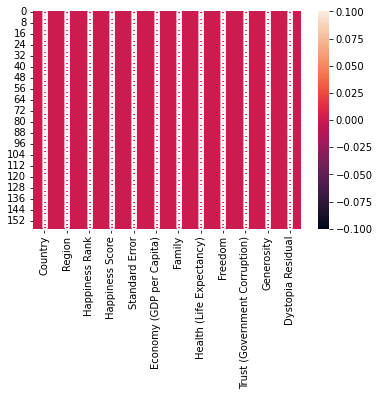

In [7]:
sns.heatmap(df.isnull(),annot=True)
plt.show()

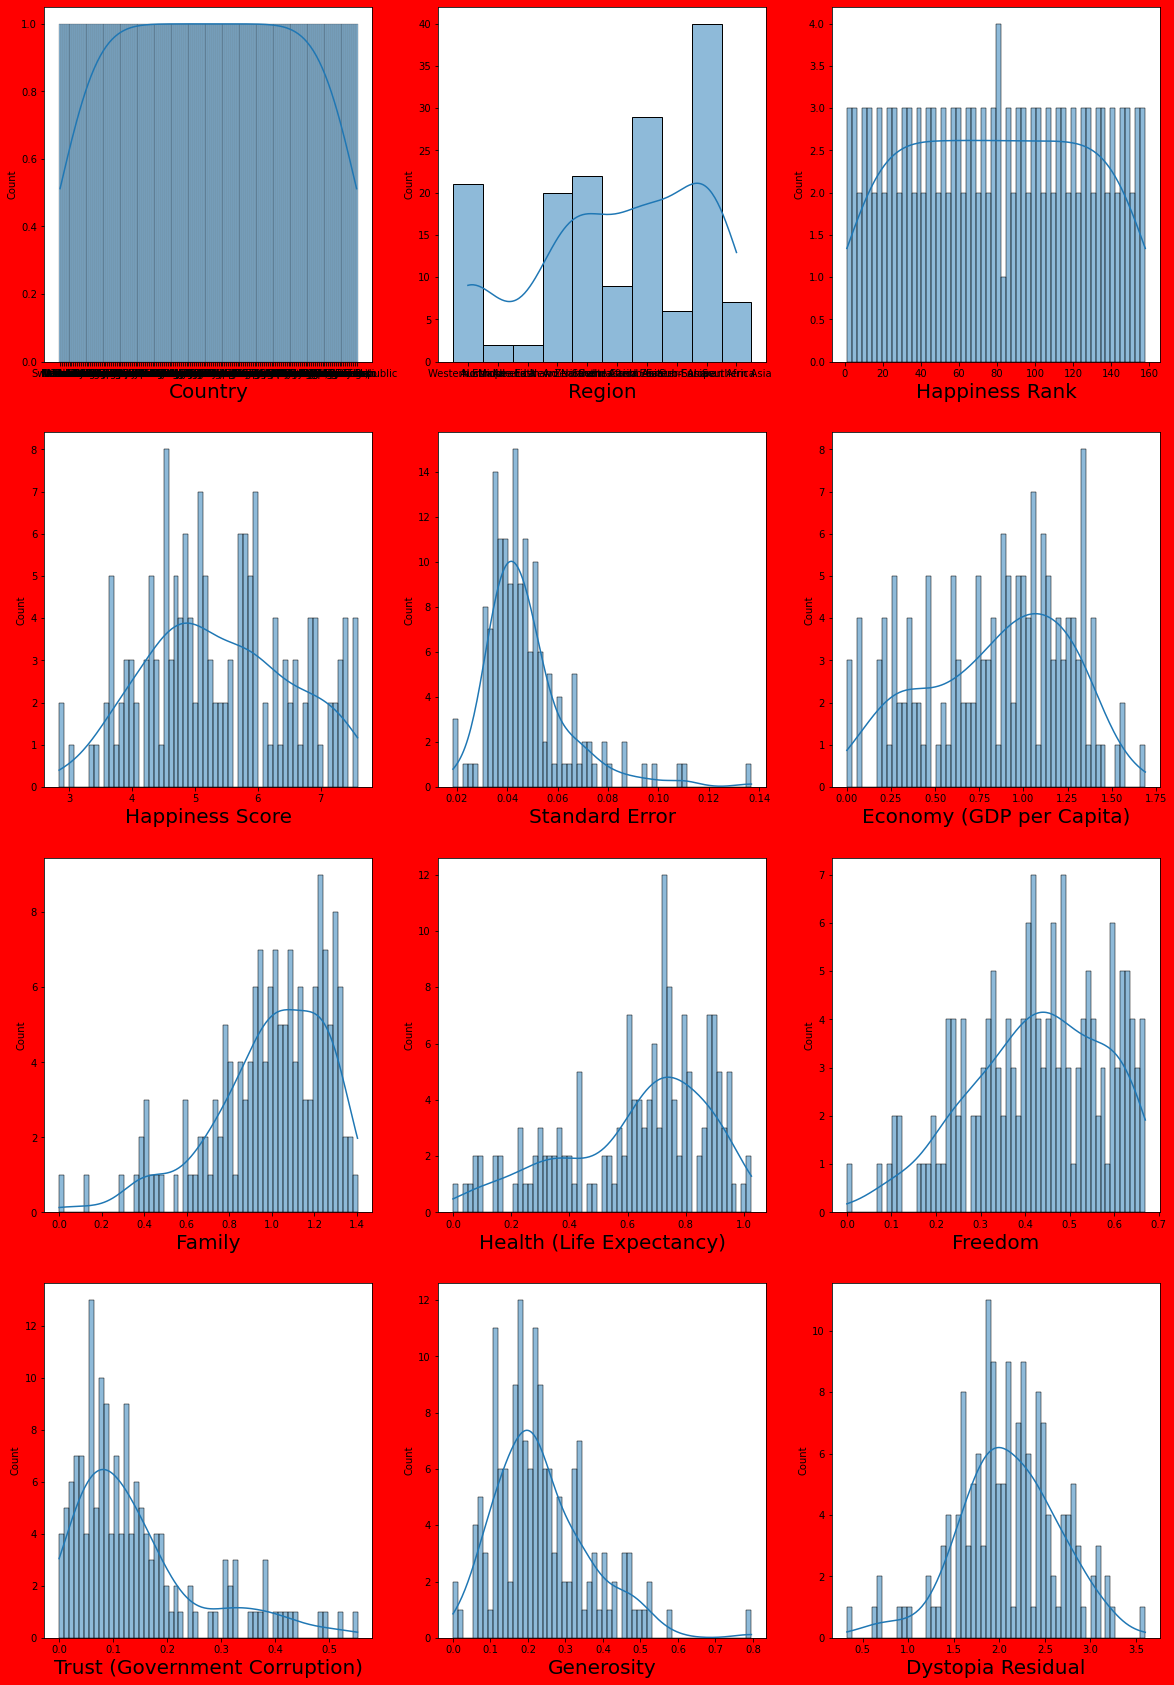

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(20,30),facecolor='red')

graph=1

for column in df.columns:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.histplot(df[column],bins=60,kde=True)
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

In [9]:
df=df.drop(["Country","Happiness Rank"],axis=1)

# encoding categorical columns

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Region']=le.fit_transform(df["Region"])


<AxesSubplot:>

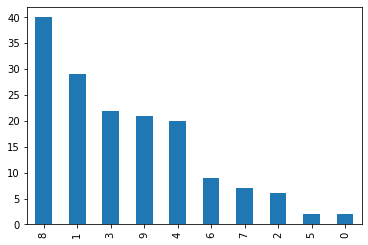

In [11]:
df["Region"].value_counts().plot.bar()


In [12]:
corr=df.corr().abs()
corr

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.176791,0.022600,0.260139,0.168533,0.357508,0.092567,0.165040,0.273557,0.057276
Happiness Score,0.176791,1.000000,0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.022600,0.177254,1.000000,0.217651,0.120728,0.310287,0.129773,0.178325,0.088439,0.083981
Economy (GDP per Capita),0.260139,0.780966,0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,0.010465,0.040059
Family,0.168533,0.740605,0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.357508,0.724200,0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,0.568211,0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,0.395199,0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,0.033105
Generosity,0.273557,0.180319,0.088439,0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,0.101301
Dystopia Residual,0.057276,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,0.033105,0.101301,1.000000


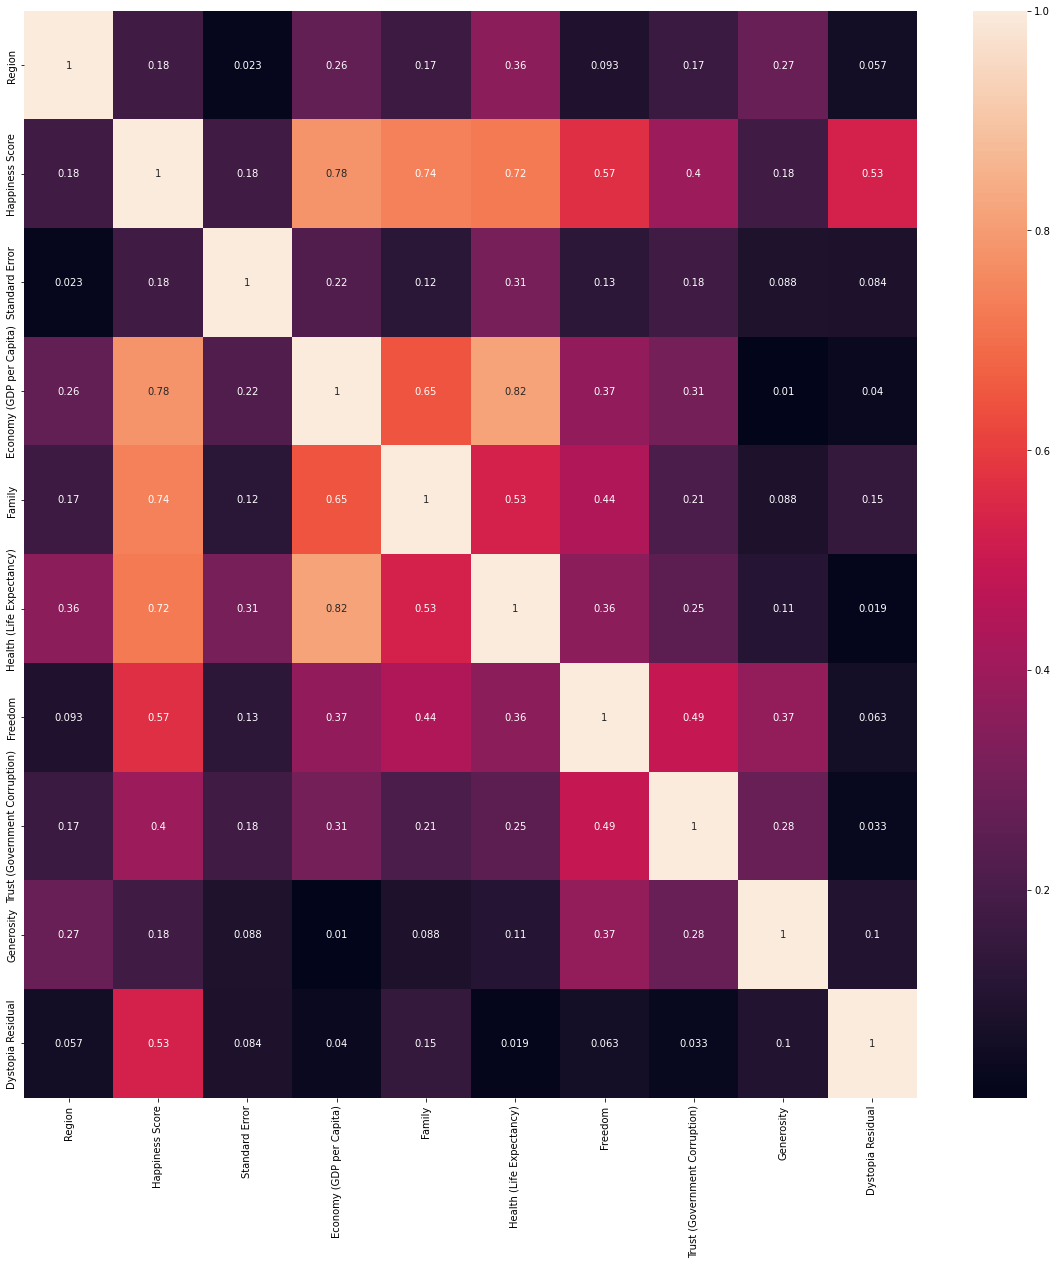

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

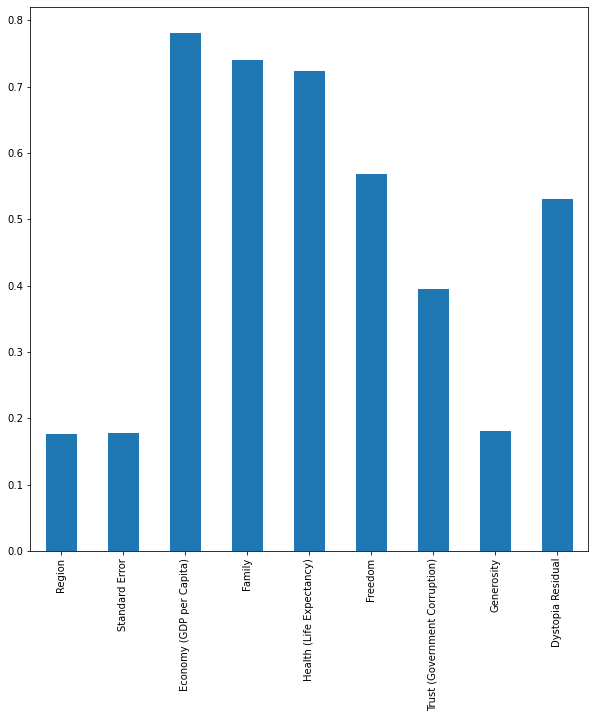

In [14]:
plt.figure(figsize=(10,10))
cor_target=df.drop('Happiness Score',axis=1).corrwith(df['Happiness Score']).abs()
cor_target.plot(kind="bar")
plt.show()

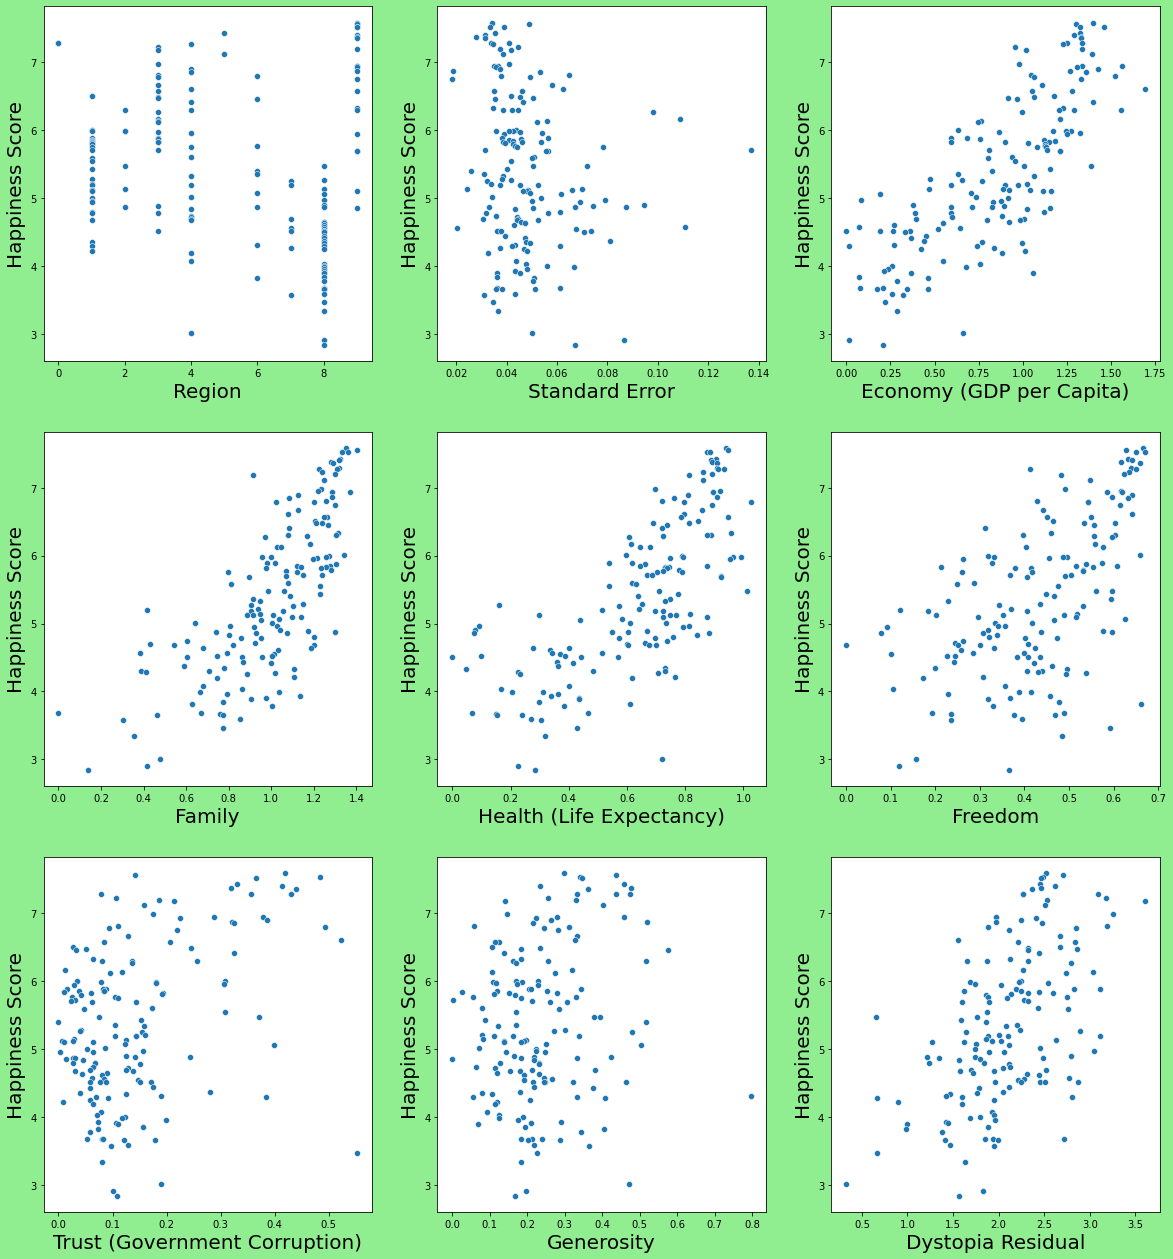

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(20,30),facecolor='lightgreen')

graph=1

for column in df.drop("Happiness Score",axis=1).columns:
    if graph<=10:
        ax=plt.subplot(4,3,graph)
        sns.scatterplot(df[column],df['Happiness Score'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Happiness Score",fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

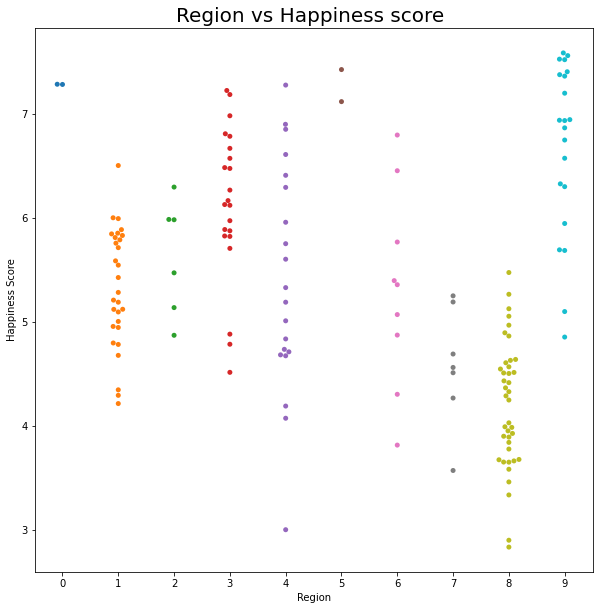

In [16]:
plt.figure(figsize=(10,10))
sns.swarmplot(df["Region"],df["Happiness Score"],data=df)
plt.title("Region vs Happiness score ", fontsize=20)
plt.show()

In [17]:
df.skew().abs()

Region                           0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)         0.317575
Family                           1.006893
Health (Life Expectancy)         0.705328
Freedom                          0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual                0.238911
dtype: float64

<AxesSubplot:>

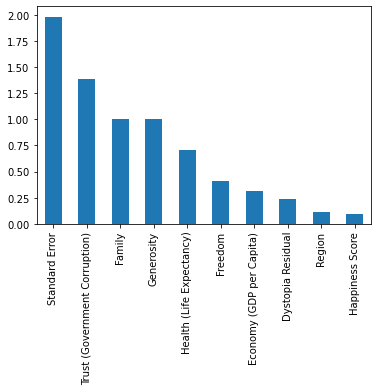

In [18]:
skew=df.skew().abs().sort_values(ascending=False)
skew.plot.bar()


In [19]:
cont=['Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']
df[cont]

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# outlier detection

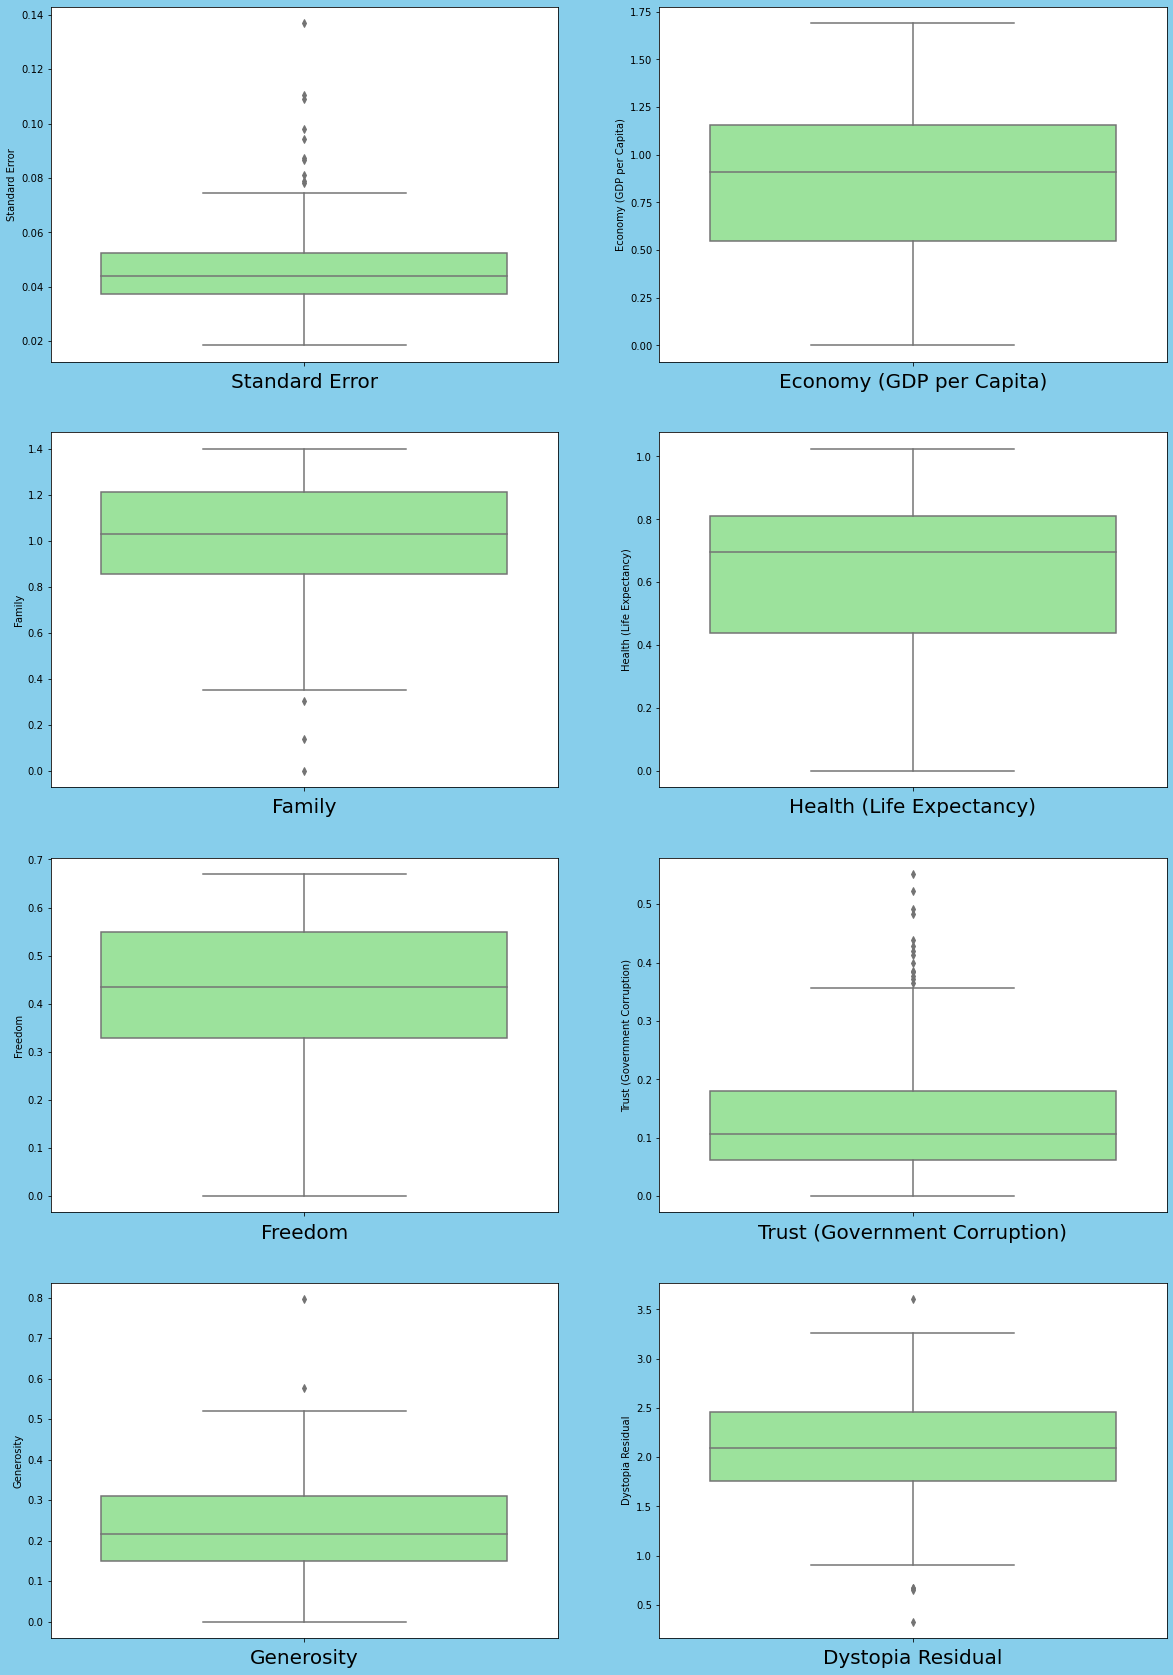

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(20,30),facecolor='skyblue')

graph=1

for column in cont:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(y=df[column],color='lightgreen')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

In [21]:
from scipy.stats import zscore
z_score=zscore(df[cont])
boole=(np.abs(z_score)<3).all(axis=1)
df=df[boole]

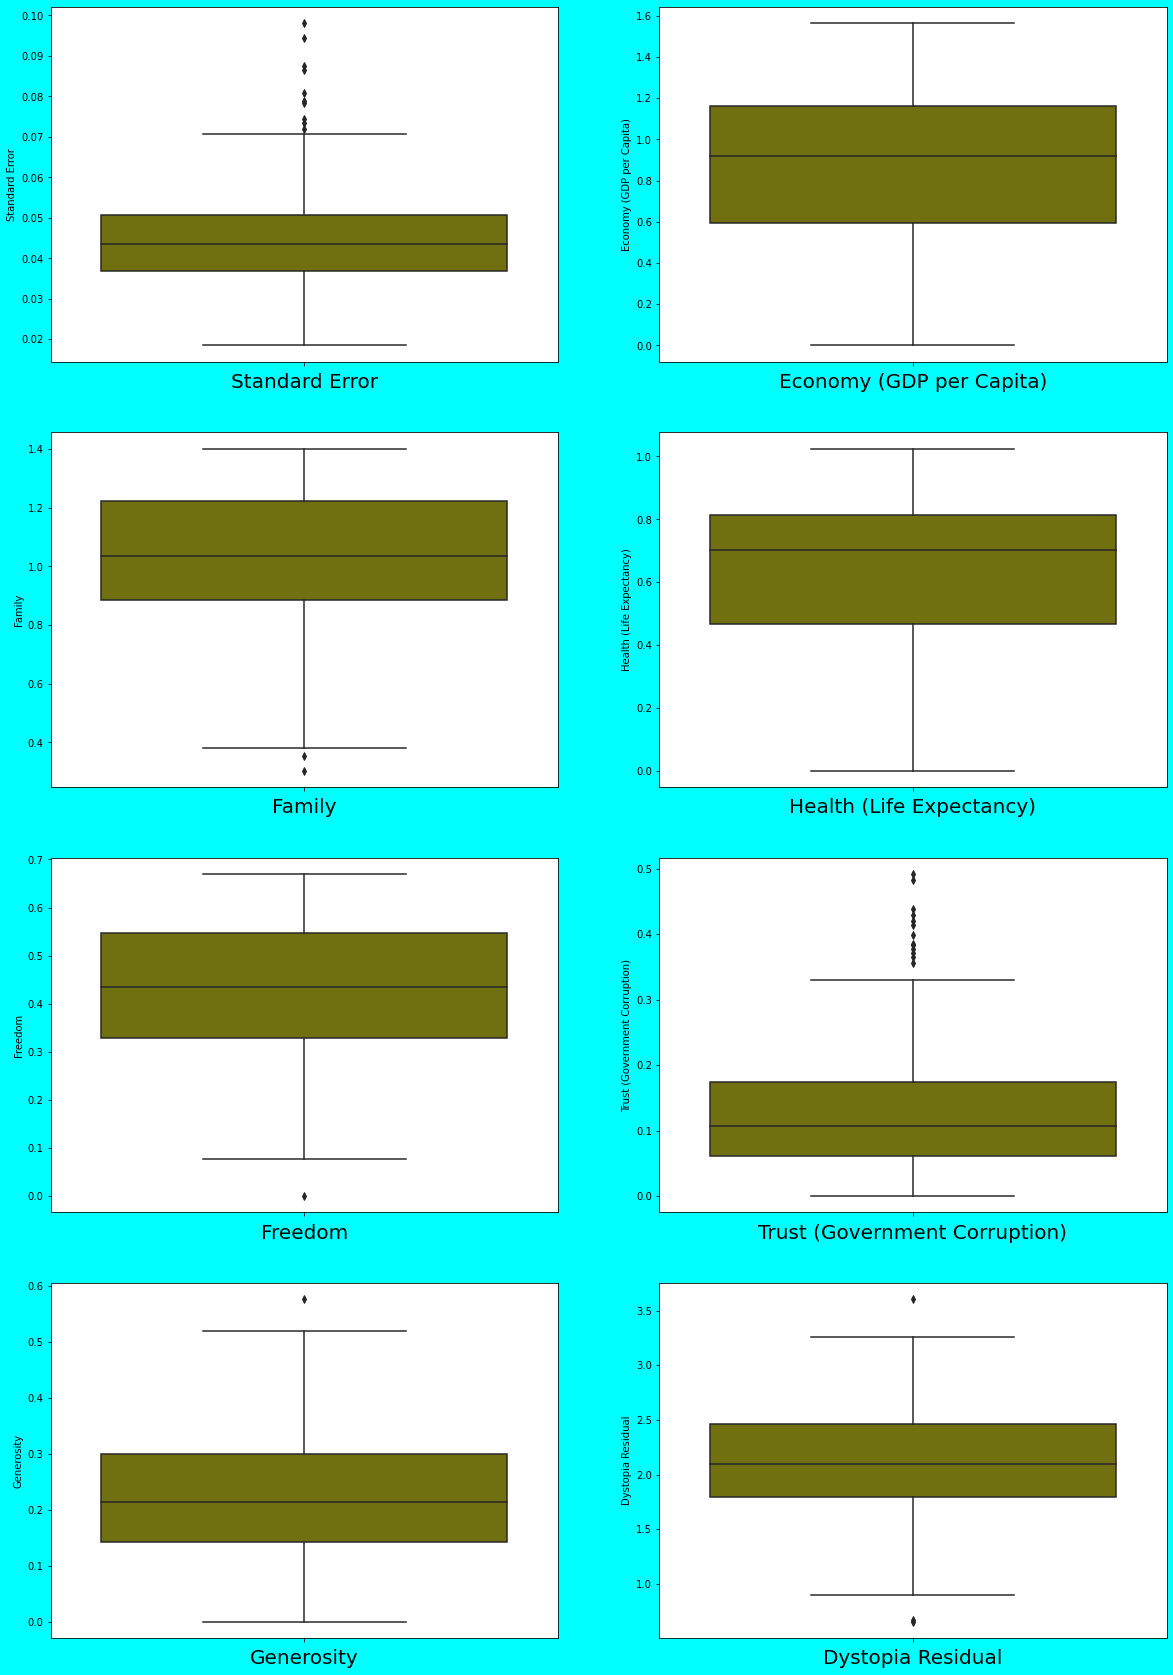

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(20,30),facecolor='cyan')

graph=1

for column in cont:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(y=df[column],color='olive')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

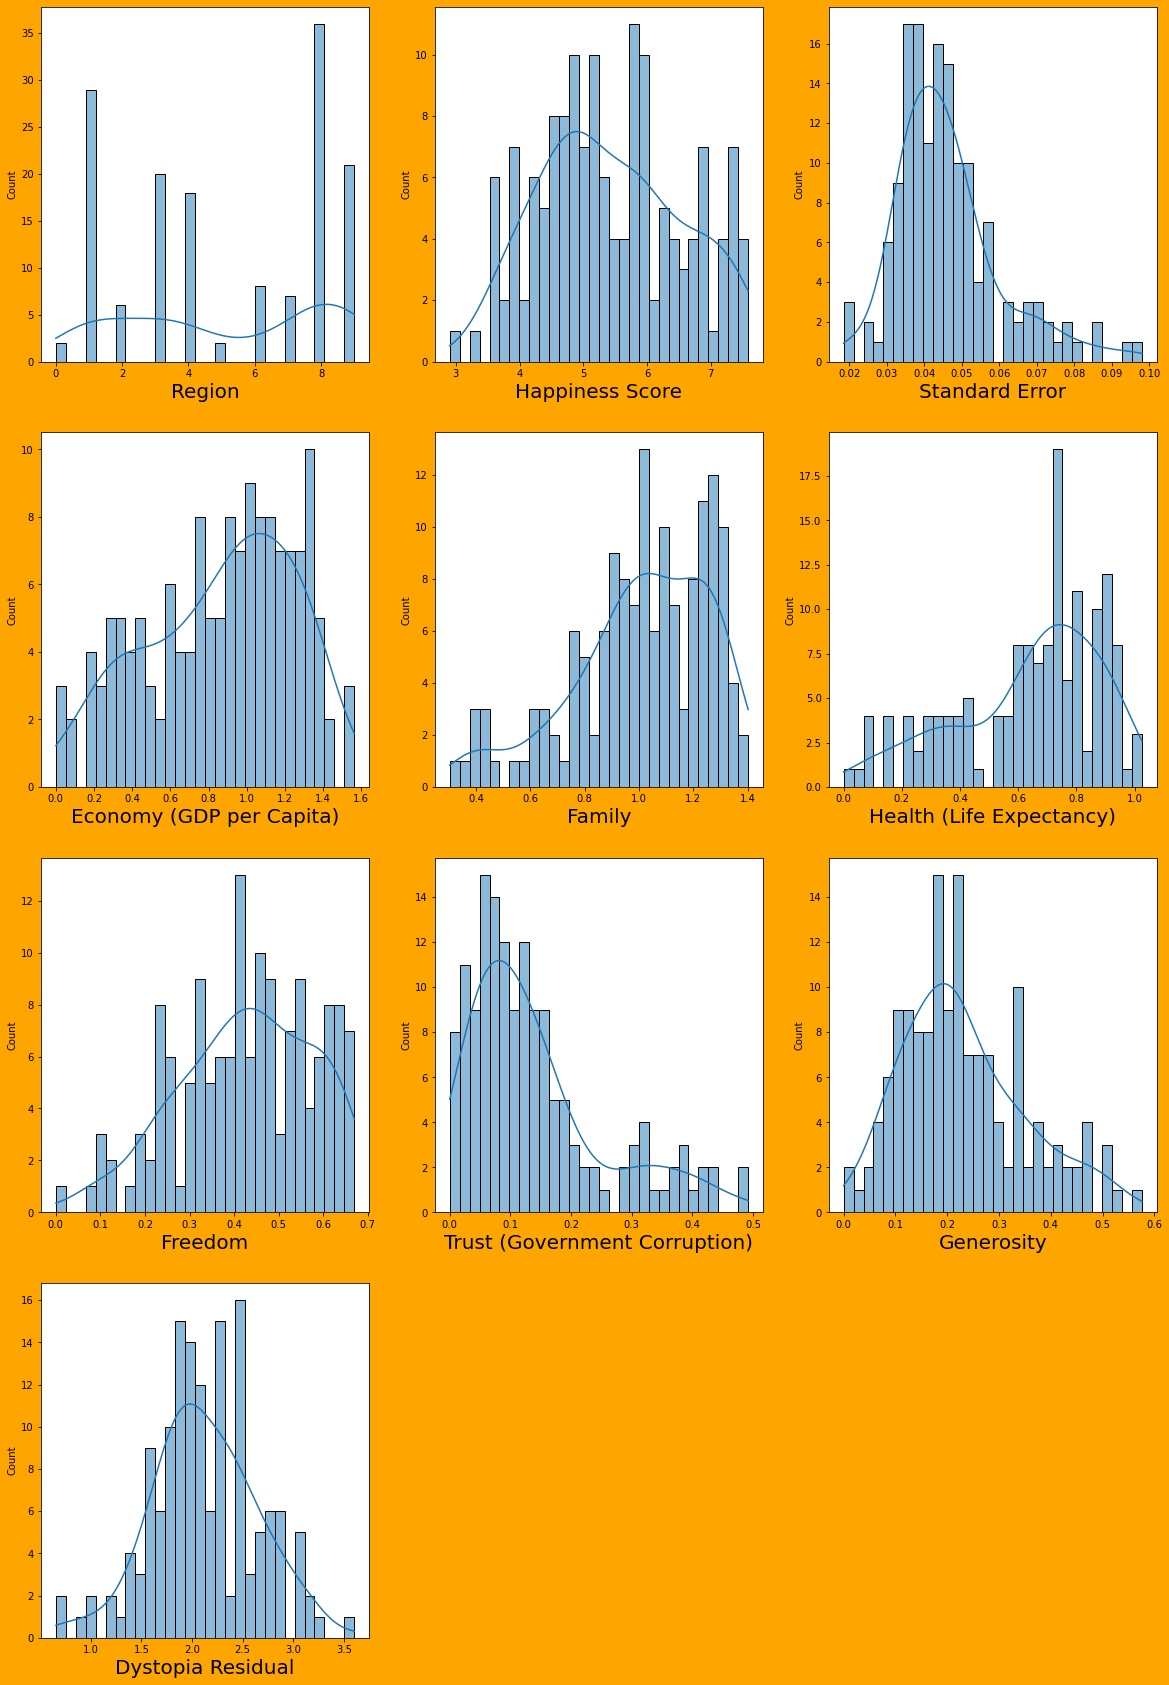

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(20,30),facecolor='orange')

graph=1

for column in df.columns:
    if graph<=10:
        ax=plt.subplot(4,3,graph)
        sns.histplot(df[column],bins=30,kde=True)
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

In [24]:
df.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

<AxesSubplot:>

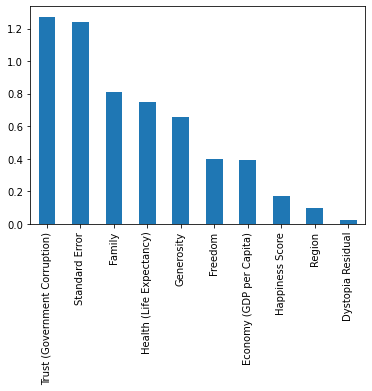

In [25]:
df.skew().abs().sort_values(ascending=False).plot.bar()

# transformation to reduce skewness in features

In [26]:
from sklearn.preprocessing import PowerTransformer
pwr=PowerTransformer(method="yeo-johnson")
df[cont]=pwr.fit_transform(df[cont])

In [27]:
((df.skew().abs()<0.2))

Region                           True
Happiness Score                  True
Standard Error                   True
Economy (GDP per Capita)         True
Family                           True
Health (Life Expectancy)         True
Freedom                          True
Trust (Government Corruption)    True
Generosity                       True
Dystopia Residual                True
dtype: bool

In [28]:
((df.skew().abs()<0.2)).all()

True

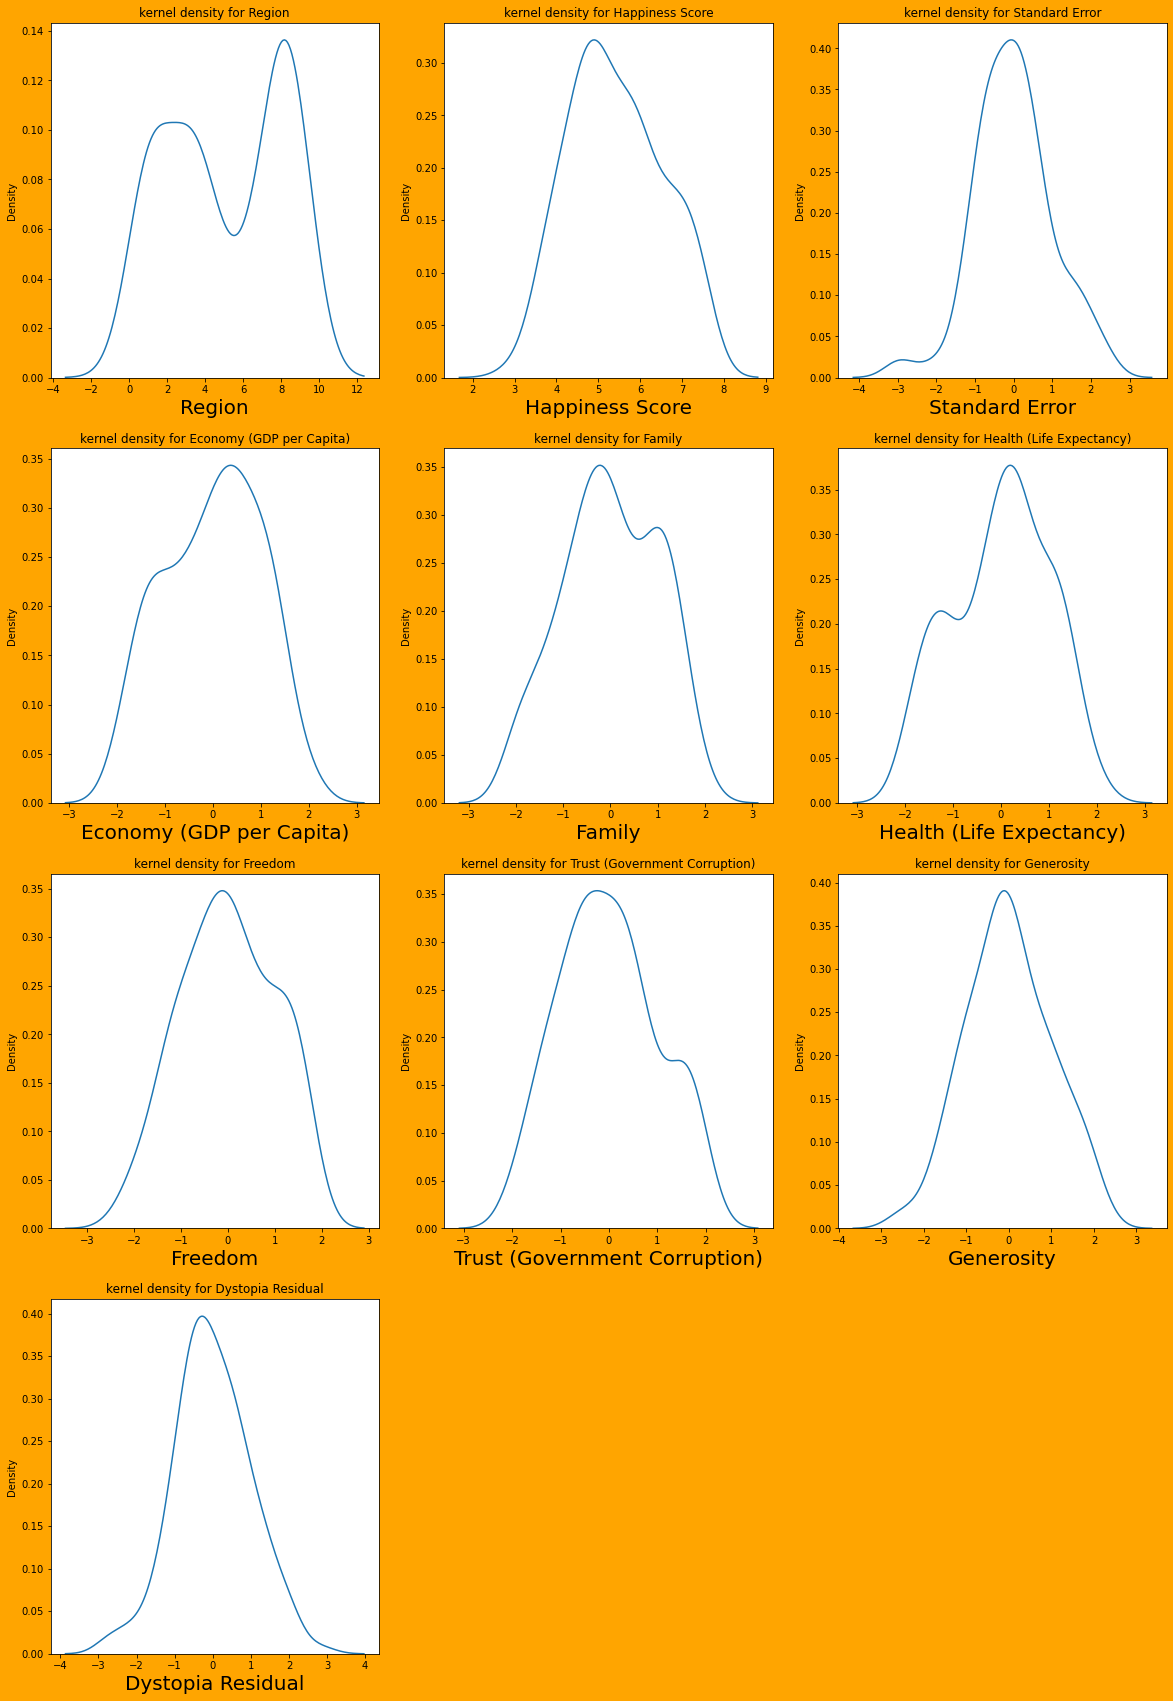

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(20,30),facecolor='orange')

graph=1

for column in df.columns:
    if graph<=10:
        ax=plt.subplot(4,3,graph)
        sns.kdeplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.title("kernel density for {}".format(column))
    graph+=1
plt.show()
plt.tight_layout()

# spliting data into feature and label

In [30]:
x=df.drop("Happiness Score",axis=1)
y=df[["Happiness Score"]]

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled.shape

(149, 9)

In [32]:
y.shape

(149, 1)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [34]:
maxRMS=0.01
maxR=0

for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    resn=LinearRegression()
    resn.fit(xtrain,ytrain)
    ypred=resn.predict(xtest)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print("RMSE",rmse, "random state",i)
    
    if rmse<maxRMS:
        maxRMS=rmse
        maxR=i
        print("RMSE",maxRMS,"random_state",i)
        
print("least root mean squared error is ",maxRMS,'on random state',maxR)        

RMSE 0.05891088747435058 random state 1
RMSE 0.0840206314291183 random state 2
RMSE 0.07901025069401901 random state 3
RMSE 0.08598004158842965 random state 4
RMSE 0.09405231815324312 random state 5
RMSE 0.0999408138817406 random state 6
RMSE 0.09268512841645585 random state 7
RMSE 0.10313495476632097 random state 8
RMSE 0.08114992583712025 random state 9
RMSE 0.09378532155997252 random state 10
RMSE 0.06478301336327984 random state 11
RMSE 0.08211799509329598 random state 12
RMSE 0.08515776903590888 random state 13
RMSE 0.09043834093957397 random state 14
RMSE 0.07977917328557352 random state 15
RMSE 0.07930056327669603 random state 16
RMSE 0.0733007515198297 random state 17
RMSE 0.0850656144887752 random state 18
RMSE 0.09189899055519529 random state 19
RMSE 0.07694304139266357 random state 20
RMSE 0.10317572426079973 random state 21
RMSE 0.09827115713941358 random state 22
RMSE 0.09659447016911575 random state 23
RMSE 0.06313185123068525 random state 24
RMSE 0.07698843148219611 rand

In [35]:
maxr2=0
max_random=0

for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    regs=LinearRegression()
    regs.fit(xtrain,ytrain)
    r2=regs.score(xtest,ytest)
    
    print("r squared",r2, "random state",i)
    
    if r2>maxr2:
        maxr2=r2
        max_random=i
        print("rsquared",maxr2,"random_state",i)
        
print("maximum r squared  is ",maxr2,'on random state',max_random)        

r squared 0.9967753412938547 random state 1
rsquared 0.9967753412938547 random_state 1
r squared 0.9941878839378415 random state 2
r squared 0.9945913008725668 random state 3
r squared 0.9952833219567583 random state 4
r squared 0.9923611145873138 random state 5
r squared 0.9912451366930076 random state 6
r squared 0.9909576502516546 random state 7
r squared 0.9926844236602471 random state 8
r squared 0.9930528607535406 random state 9
r squared 0.9916383723008656 random state 10
r squared 0.9968146357812802 random state 11
rsquared 0.9968146357812802 random_state 11
r squared 0.9950470763434017 random state 12
r squared 0.9942359582334617 random state 13
r squared 0.993370846576168 random state 14
r squared 0.9948825572785169 random state 15
r squared 0.9937670454403822 random state 16
r squared 0.9947859062072661 random state 17
r squared 0.9939339098427491 random state 18
r squared 0.9945531274407166 random state 19
r squared 0.9949843315199415 random state 20
r squared 0.99036782933

In [36]:
print("maximum r squared  is ",maxr2,'on random state',max_random)        
print("least root mean squared error is ",maxRMS,'on random state',maxR)        

maximum r squared  is  0.9976670916136632 on random state 37
least root mean squared error is  0.01 on random state 0


 we will go through random state of 37

# training model

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=37)
# modelfitting


In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [56]:
names = ['lin_reg', "knn", "svr","gbreg", "dtr","rfr","xgr"]
regressors = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=3,metric="minkowski",leaf_size=20),
    SVR(kernel="linear", C=10,gamma=1),
    GradientBoostingRegressor(n_estimators=45,max_depth=6),
    DecisionTreeRegressor(max_depth=6),
    RandomForestRegressor(max_depth=6, n_estimators=45,bootstrap=True,oob_score=True),
    XGBRegressor(max_depth=6,learning_rate=1,n_estimators=50)]

In [57]:
scores_train= []
scores_test=[]
for name,reg in zip(names,regressors):
    reg.fit(x_train,y_train)
    score = reg.score(x_train,y_train)
    score_test=reg.score(x_test,y_test)
    scores_train.append(score)
    scores_test.append(score_test)

In [58]:
score=pd.DataFrame({"Regressor":names,"train_score":scores_train,"Test score":scores_test})
score


,Regressor,train_score,Test score
0,lin_reg,0.993710,0.997667
1,knn,0.930650,0.874354
2,svr,0.993248,0.997120
3,gbreg,0.999903,0.857084
4,dtr,0.984015,0.808533
5,rfr,0.975827,0.902841
6,xgr,1.000000,0.740482


# cross validation score with scoting func as r2

In [59]:
from sklearn.model_selection import cross_val_score
cv_scores_mean=[]
cv_scores=[]
for name,reg in zip(names,regressors):
    scr=cross_val_score(reg,x_scaled,y,cv=5,scoring="r2")
    cv_scores.append(scr)   
    cv_scores_mean.append(scr.mean())
cv_scores    

[array([0.94399777, 0.87146375, 0.82477529, 0.80990949, 0.85062886]),
 array([-7.41020823, -4.33985559, -2.66048647, -9.72147948, -4.97709506]),
 array([0.91729285, 0.84676011, 0.80724448, 0.72454694, 0.89924357]),
 array([-6.40117763, -3.0701902 , -3.01407947, -8.2622369 , -5.52901627]),
 array([-10.67985697,  -8.36869991,  -7.45665207, -14.54853457,
         -5.89372956]),
 array([-7.68189256, -0.85964715, -0.87977278, -3.24895015, -6.59968944]),
 array([ -6.49489771,  -9.19393264,  -7.53223826, -23.07998647,
         -5.64222308])]

In [60]:
cv_score=pd.DataFrame({"regressor name":names,"cross_val_score":cv_scores,"cross_val_score_mean":cv_scores_mean})
cv_score

,regressor name,cross_val_score,cross_val_score_mean
0,lin_reg,"[0.9439977743246517, 0.8714637506291643, 0.824...",0.860155
1,knn,"[-7.410208234165239, -4.3398555897514255, -2.6...",-5.821825
2,svr,"[0.9172928504118268, 0.8467601086744717, 0.807...",0.839018
3,gbreg,"[-6.401177625679938, -3.0701901962354103, -3.0...",-5.255340
4,dtr,"[-10.67985697290102, -8.36869991314232, -7.456...",-9.389495
5,rfr,"[-7.681892564813719, -0.8596471514374113, -0.8...",-3.853990
6,xgr,"[-6.4948977075460865, -9.193932637286617, -7.5...",-10.388656


# we can find cross validation score with RMSE as scoring function

In [44]:
from sklearn.model_selection import cross_val_score
rmse_mean=[]
rmse=[]
for name,reg in zip(names,regressors):
    crs=cross_val_score(reg,x_scaled,y,cv=3,scoring="neg_mean_squared_error")
    rmse.append(crs)   
    rmse_mean.append(crs.mean())
rmse   

[array([-0.01766253, -0.00733699, -0.02548068]),
 array([-1.38813695, -0.28954015, -1.0798948 ]),
 array([-0.05506731, -0.00999262, -0.09263863]),
 array([-1.29474337, -0.30204431, -0.92937311]),
 array([-1.51743108, -0.49367229, -0.9267215 ]),
 array([-1.38464855, -0.0970679 , -1.02764998]),
 array([-1.38076426, -0.88430245, -0.95153444])]

In [45]:
RMSE=pd.DataFrame({"regressor name":names,"rmse":rmse,"rmse_mean":rmse_mean})
RMSE

,regressor name,rmse,rmse_mean
0,lin_reg,"[-0.01766253461545388, -0.007336992862423927, ...",-0.016827
1,knn,"[-1.3881369466666666, -0.2895401533333335, -1....",-0.919191
2,svr,"[-0.05506730531204318, -0.009992619969453125, ...",-0.052566
3,gbreg,"[-1.294743365419456, -0.30204430553106126, -0....",-0.842054
4,dtr,"[-1.5174310822222217, -0.4936722922450113, -0....",-0.979275
5,rfr,"[-1.384648552095653, -0.09706789668589812, -1....",-0.836455
6,xgr,"[-1.3807642554127206, -0.8843024482106118, -0....",-1.072200


# LINEAR REGRESSION performance is good for both RMSE and R2

# Linear regression is performing well on out of all regressor
  regularization techniques to avoid overfitting

In [46]:
# regularization techniques to avoid overfitting
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [47]:
las=LassoCV(n_alphas=200,max_iter=100,cv=7,normalize=False)  # as standardization is done so keep false normalize
las.fit(x_train,y_train)
a=las.alpha_
a

0.004188379691076771

In [48]:
las_reg=Lasso(a)
las_reg.fit(x_train,y_train)
las_reg.score(x_test,y_test)


0.9978395501593496

In [49]:
# ridge regression  ridge regression does rquire value cannot be none
rid=RidgeCV(cv=7,normalize=False)  
rid.fit(x_train,y_train)
alfa=rid.alpha_
alfa

0.1

In [50]:
rid_reg=Ridge(alfa)
rid_reg.fit(x_train,y_train)
rid_reg.score(x_test,y_test)

0.9976815927404421

In [51]:
from sklearn.metrics import mean_squared_error
pred_test_las=las_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,pred_test_las))

0.057455462129337886

In [52]:
pred_test_rid=rid_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,pred_test_rid))

0.059518789829149966

 Visualizing actual label vs predictes labels

Text(0, 0.5, 'Predicted values of Target')

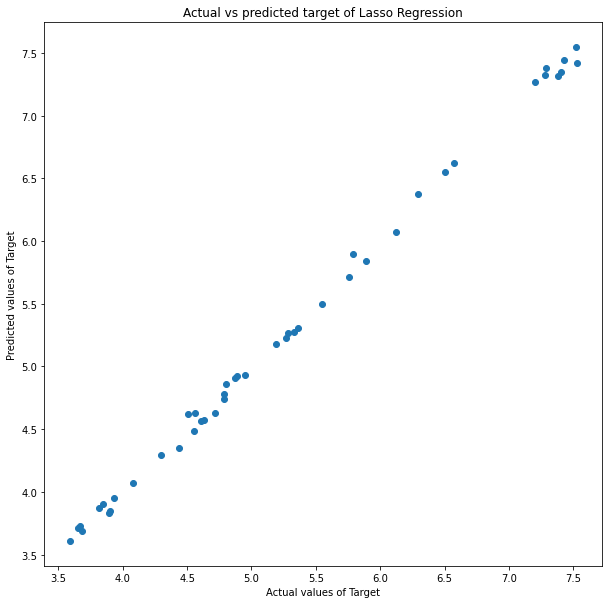

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,pred_test_las)
plt.title("Actual vs predicted target of Lasso Regression")
plt.xlabel("Actual values of Target",fontsize=10)
plt.ylabel("Predicted values of Target",fontsize=10)

Text(0, 0.5, 'Predicted values of Target')

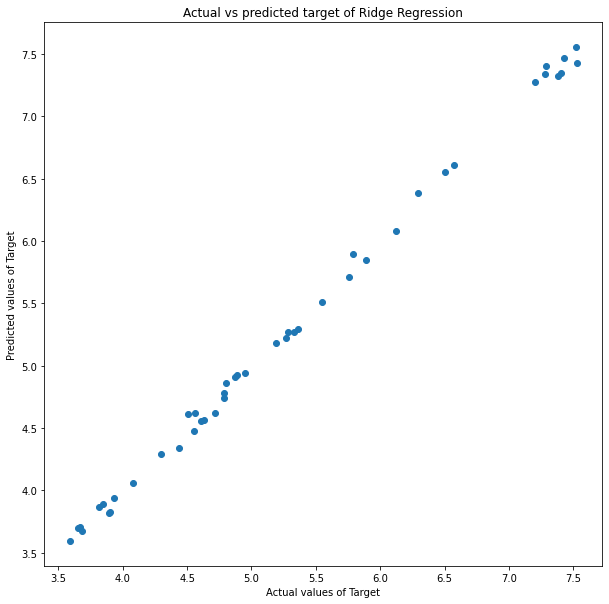

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,pred_test_rid)
plt.title("Actual vs predicted target of Ridge Regression")
plt.xlabel("Actual values of Target",fontsize=10)
plt.ylabel("Predicted values of Target",fontsize=10)

we will also chech for perfomance by hyperparameter tuning on  SVR

In [69]:
from sklearn.model_selection import GridSearchCV

param={'kernel':['linear','poly','rbf','sigmoid'],
       'gamma':[1,0.1,0.01,0.001,0.0001],
       "C":[0.1,1,10,100,1000]}
       
gsv=GridSearchCV(SVR(),param)
gsv.fit(x_train,y_train)
print(gsv.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [70]:
svr2=gsv.best_estimator_.fit(x_train,y_train)

In [71]:
svr2.score(x_train,y_train)

0.9961258669069739

In [72]:
svr2.score(x_test,y_test)

0.9975899594038894

In [73]:
pred_svr_test=svr2.predict(x_test)

In [74]:
# we can find RMSE for svr2 prediction 
np.sqrt(mean_squared_error(y_test,pred_svr_test))

0.060683609829917426

Text(0, 0.5, 'Predicted values of Target')

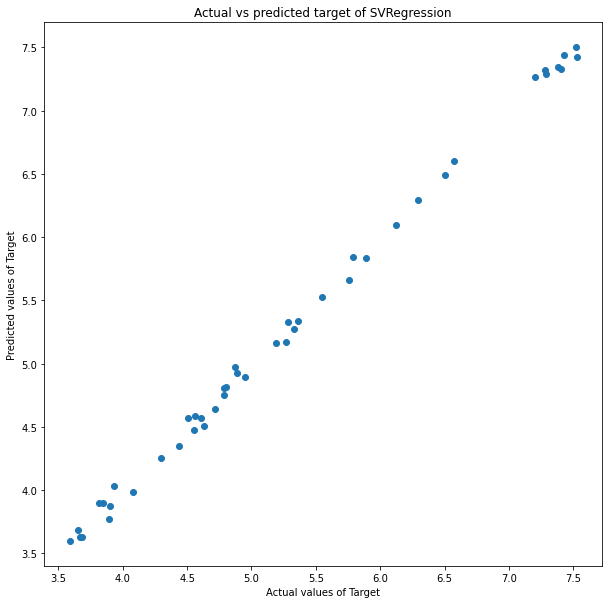

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,pred_svr_test)
plt.title("Actual vs predicted target of SVRegression")
plt.xlabel("Actual values of Target",fontsize=10)
plt.ylabel("Predicted values of Target",fontsize=10)

# by evaluating RMSE and SCore of Lasso regrssion, Ridge REgression And SVRegression , clearly we can choose our best model 
 las_reg=Lasso(alpha=0.004188379691076771)

# we can finalize our model as lasso regration as it is giving r2 score of 0.9978 and RMSE of 0.0574 .


In [76]:
import joblib
joblib.dump(las_reg,"WHRegressorMOdel.pkl")

['WHRegressorMOdel.pkl']